In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_total = pd.merge(mouse_metadata,study_results, on=["Mouse ID"])

# Display the data table for preview
mouse_data_total.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [136]:
# Checking the number of mice.
mice_number = mouse_data_total['Mouse ID'].value_counts()
mice_number

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [144]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Generating series to find duplicate rows
duplicates = mouse_data_total.duplicated()

#Finding index of duplicate row
duplicate_mouse = duplicates.loc[(duplicates == True)].index
duplicate_mouse

Int64Index([909], dtype='int64')

In [143]:
#Finding mouse ID of duplicate row
duplicate_row = mouse_data_total.loc[duplicate_mouse]
duplicate_ID=duplicate_row.iloc[0]['Mouse ID']
duplicate_ID

'g989'

In [86]:
# Optional: Get all the data for the duplicate mouse ID. 
#Print data from Mouse ID with duplicate row
mouse_data_total.loc[(mouse_data_total['Mouse ID'] == duplicate_ID)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [145]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_data_clean = mouse_data_total[mouse_data_total['Mouse ID'] != duplicate_ID]
mouse_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [151]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean1=mouse_data_clean['Mouse ID'].value_counts()
mouse_count_clean1

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [171]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_group=mouse_data_clean.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = (regimen_group['Tumor Volume (mm3)'].mean()).rename("Mean")
tumor_median= (regimen_group['Tumor Volume (mm3)'].median()).rename("Median")
tumor_variance= (regimen_group['Tumor Volume (mm3)'].var()).rename("Variance")
tumor_stdv= (regimen_group['Tumor Volume (mm3)'].std()).rename("St. Deviation")
tumor_SEM= (regimen_group['Tumor Volume (mm3)'].sem()).rename("SEM")

# Assemble the resulting series into a single summary dataframe.
drug_summary_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), [tumor_mean, tumor_median, tumor_variance,
                                                           tumor_stdv, tumor_SEM])
#drug_summary
drug_summary_merged

drug_summary_merged.sort_values(by=['Mean'])

,Mean,Median,Variance,St. Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [175]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary2=mouse_data_clean.groupby(['Drug Regimen'],as_index=True).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
drug_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, 'Number of Mice')

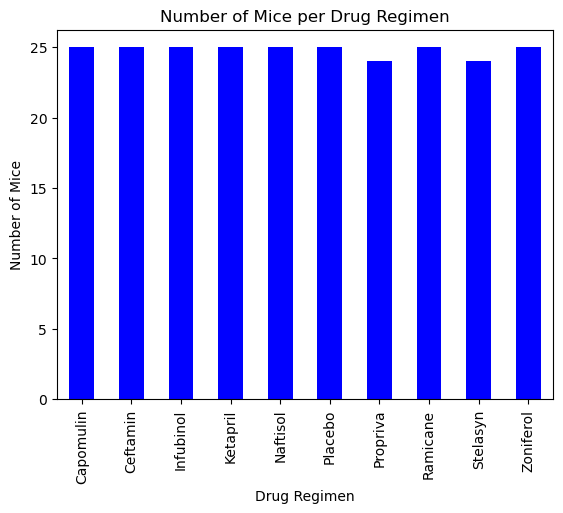

In [197]:

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Generate regimen groups with unique counts for mice
mouse_groups =regimen_groups['Mouse ID'].unique()

regimen_counts=[]
for index in range(len(mouse_groups)):
    regimen_counts+=[len(mouse_groups[index])]
    
#Set x_axis
x_axis=np.arange(len(regimen_counts))

#Generate bar chart
regimen_df = pd.DataFrame({'Drug Regimen':regimen_names, 'Number of Mice':regimen_counts})
regimen_bar = regimen_df.plot.bar(x='Drug Regimen', y='Number of Mice', rot=90, title="Number of Mice per Drug Regimen", legend=False, color='b')
regimen_bar.set_ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice Tested')

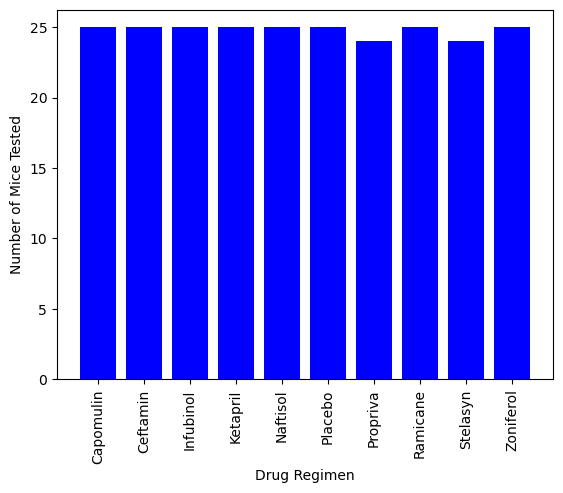

In [198]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(x_axis, regimen_counts, color="b", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_names, rotation="vertical")

# Give chart labels and a tile

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

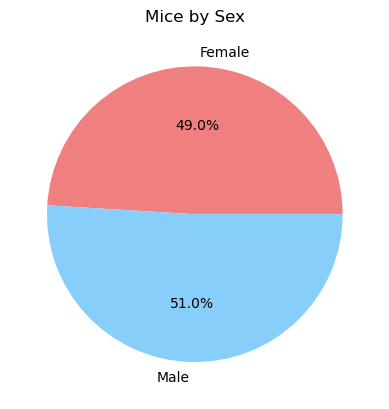

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group=mouse_data_clean.groupby('Sex')
sex_counts = (sex_group['Mouse ID'].count()).rename("Count")

sex_type=['Female', 'Male']
sex_number=[int(sex_counts[0]), int(sex_counts[1])] 

colors=["lightcoral","lightskyblue"]

#Generate pie chart
sex_df = pd.DataFrame({'Sex': sex_number}, index= sex_type)
plot = sex_df.plot.pie(y='Sex', title="Mice by Sex", legend=False, autopct="%1.1f%%", label='', colors=colors)

Text(0.5, 1.0, 'Mice by Sex')

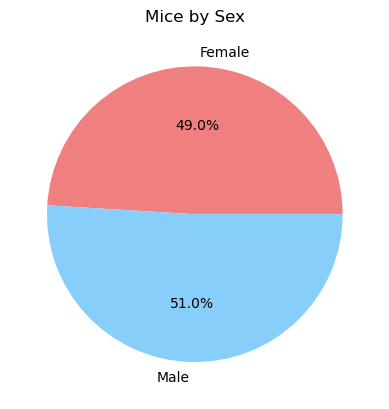

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_number, labels=sex_type, colors=colors, autopct="%1.1f%%")
plt.title("Mice by Sex")

In [206]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_data_subset = mouse_data_clean.loc[(mouse_data_cleaned['Drug Regimen'] == 'Capomulin') | 
                       (mouse_data_clean['Drug Regimen'] == 'Ramicane') |
                      (mouse_data_clean['Drug Regimen'] == 'Infubinol') |
                      (mouse_data_clean['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
grouped_subset = mouse_data_subset.groupby('Mouse ID')
greatest_timepoint = mouse_data_subset.groupby('Mouse ID')["Timepoint"].transform('max')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data_subset.insert(8, "Greatest Timepoint", greatest_timepoint, True) 

#Generate list of values
greatest_overall = mouse_data_subset.loc[mouse_data_subset['Timepoint'] == mouse_data_subset['Greatest Timepoint']]
greatest_overall.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = greatest_overall[greatest_overall['Drug Regimen'] == 'Capomulin']
ramicane = greatest_overall[greatest_overall['Drug Regimen'] == 'Ramicane']
infubinol = greatest_overall[greatest_overall['Drug Regimen'] == 'Infubinol']
ceftamin = greatest_overall[greatest_overall['Drug Regimen'] == 'Ceftamin']

# add subset 
capomulin_sub=capomulin['Tumor Volume (mm3)']
ramicane_sub=ramicane['Tumor Volume (mm3)']
infubinol_sub=infubinol['Tumor Volume (mm3)']
ceftamin_sub=ceftamin['Tumor Volume (mm3)']

# Determine outliers using upper and lower bounds
#upper and lower bounds Capomulin
capo_quartiles = capomulin_sub.quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq

capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)

#upper and lower bounds Ramicane
rami_quartiles = ramicane_sub.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq

rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)

#upper and lower bounds Infubinol
infu_quartiles = infubinol_sub.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq

infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)

#upper and lower bounds Ceftamin
ceft_quartiles = ceftamin_sub.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

#Print outliers
print(f"Values below {capo_lower_bound} could be outliers for Capomulin.")
print(f"Values above {capo_upper_bound} could be outliers for Capomulin.")
print(f"Values below {rami_lower_bound} could be outliers for Ramicane.")
print(f"Values above {rami_upper_bound} could be outliers for Ramicane.")
print(f"Values below {infu_lower_bound} could be outliers for Infubinol.")
print(f"Values above {infu_upper_bound} could be outliers for Infubinol.")
print(f"Values below {ceft_lower_bound} could be outliers for Ceftamin.")
print(f"Values above {ceft_upper_bound} could be outliers for Ceftamin.")

Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


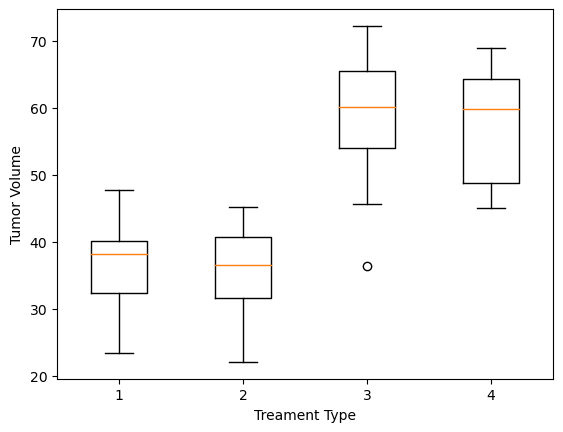

In [210]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capomulin_sub, ramicane_sub, infubinol_sub, ceftamin_sub]
fig1, ax1 = plt.subplots()
plt.xlabel("Treament Type")
plt.ylabel("Tumor Volume")
ax1.boxplot(data)

plt.show()

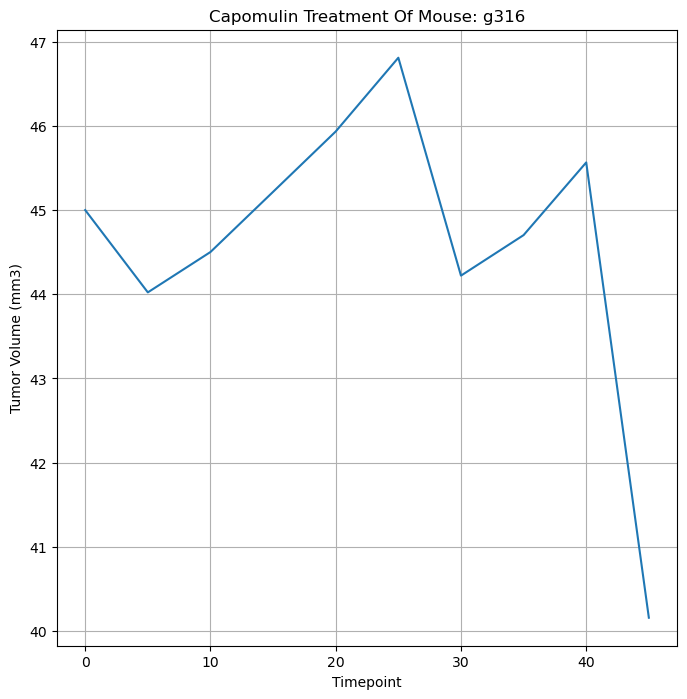

In [211]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Set ID for random mouse on Capomulin regimen
random_mouse_capomulin = (mouse_data_subset[mouse_data_subset['Drug Regimen'] == 'Capomulin']).sample()
random_mouse_ID = random_mouse_capomulin.iloc[0]['Mouse ID']
random_mouse_data=mouse_data_subset[mouse_data_subset['Mouse ID'] == random_mouse_ID]

#Generate plot for random mouse treated with Capomulin
random_mouse_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin Treatment Of Mouse: " + str(random_mouse_ID), legend=False)
plt.ylabel("Tumor Volume (mm3)")
plt.show()

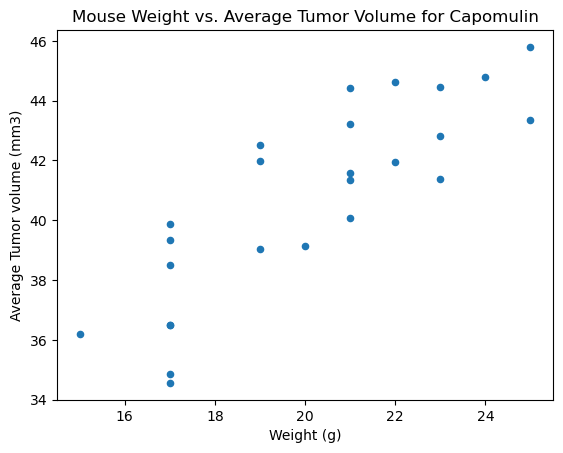

In [101]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_data_capomulin = mouse_data_subset[mouse_data_subset['Drug Regimen'] == 'Capomulin']
mouse_data_capomulin_ave = mouse_data_capomulin.groupby('Mouse ID')
mouse_data_capomulin_ave=mouse_data_capomulin.groupby(['Mouse ID'],as_index=False).agg({
    'Tumor Volume (mm3)' : ['mean'], 'Weight (g)' : ['median']})

mouse_data_capomulin_ave.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",
              title="Mouse Weight vs. Average Tumor Volume for Capomulin", legend=True)
plt.ylabel("Average Tumor volume (mm3)")
plt.show()

In [213]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient between mouse weight and average tumor volume
capomulin_weight=mouse_data_capomulin_ave[mouse_data_capomulin_ave.columns[2]]
capomulin_ave_tumor= mouse_data_capomulin_ave[mouse_data_capomulin_ave.columns[1]]

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(capomulin_ave_tumor, capomulin_weight)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


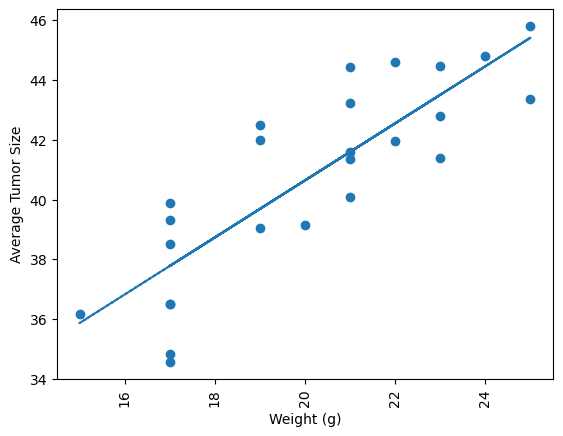

In [212]:
#Calculate linear regression model
# Perform a linear regression on average tumor volume versus weight
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(capomulin_weight, capomulin_ave_tumor)

# Create equation of line to calculate predicted violent crime rate
mouse_fit = mouse_slope * capomulin_weight + mouse_int

plt.scatter(capomulin_weight, capomulin_ave_tumor)
plt.plot(capomulin_weight, mouse_fit,"--")
plt.xticks(rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Size')
plt.show()